机器学习
数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

机器学习的一般框架

选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
训练模型： 使用训练数据集来拟合模型。
评估模型： 使用测试数据集评估模型性能。
调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
预测： 使用训练好的模型进行新数据的预测。

题目一、以鸢尾花数据集为例学习 SVM
1.加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
2.创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
3.使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 加载鸢尾花数据集
iris = load_iris()

# 划分数据集，训练集比例 0.2，随机种子 42
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


In [2]:
from sklearn import svm
from sklearn import metrics

# 创建 SVM 模型，使用线性核函数，随机种子 42
clf = svm.SVC(kernel='linear', random_state=42)

# 训练模型
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [3]:
# 预测测试集结果
y_pred = clf.predict(X_test)

# 计算 Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 计算 Recall
recall = metrics.recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# 计算 F1 Score
f1_score = metrics.f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1_score)

# 绘制 Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


题目二、以新闻数据分类为例 学习朴素贝叶斯
导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
查看类别标签、数据集的描述、数据样本
将文本数据转换为词袋模型
将数据集分为训练集和测试集，训练集比例0.2，随机种子42
创建并训练朴素贝叶斯分类器
使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

In [4]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

类别标签： ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述： .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fea

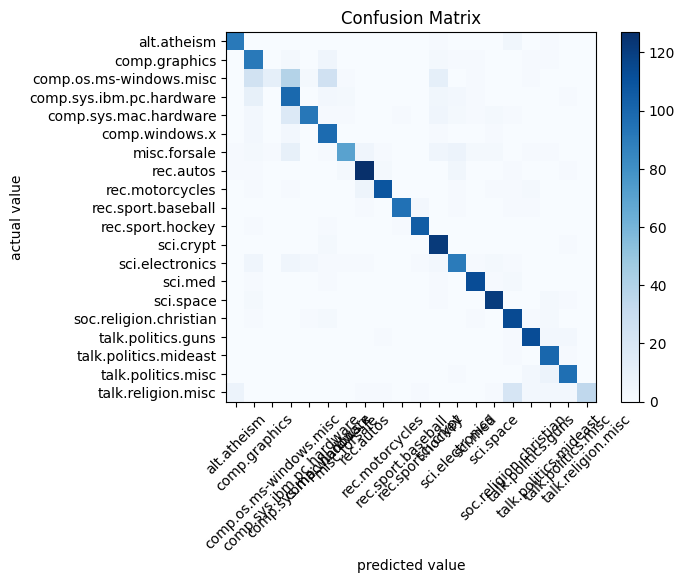

In [7]:
data = fetch_20newsgroups()
print("类别标签：", data.target_names)
print("数据集描述：", data.DESCR)
print("数据样本：", data.data[0])

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data.data)

X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42)

clf = MultinomialNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("准确率：", accuracy)
print("召回率：", recall)
print("F1 分数：", f1)

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

题目三、以鸢尾花数据集为例 学习k-means聚类
导入数据集和聚类库
使用k-means聚类，将数据分为3个簇，设置随机种子为0
PCA 降维到2维空间后，输出可视化结果
尝试先降维，再聚类，再输出可视化结果，比较两次的不同
使用轮廓系数比较聚类效果
绘制轮廓系数与聚类数的关系图

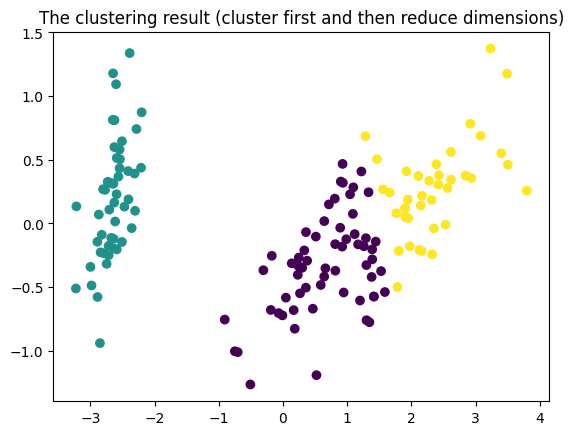

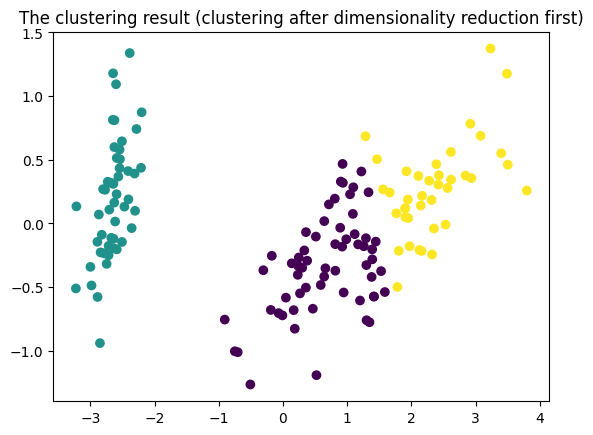

先聚类后降维的轮廓系数： 0.551191604619592
先降维后聚类的轮廓系数： 0.5976764219547992


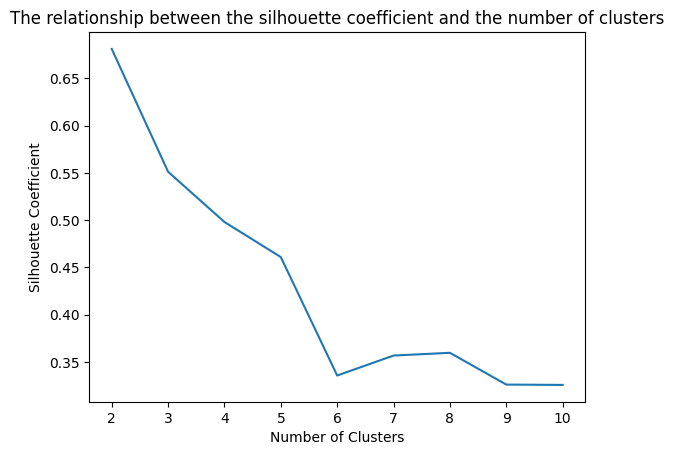

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title('The clustering result (cluster first and then reduce dimensions)')
plt.show()

X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_)
plt.title('The clustering result (clustering after dimensionality reduction first)')
plt.show()

silhouette_avg_1 = silhouette_score(X, kmeans.labels_)
silhouette_avg_2 = silhouette_score(X_pca, kmeans_pca.labels_)
print("先聚类后降维的轮廓系数：", silhouette_avg_1)
print("先降维后聚类的轮廓系数：", silhouette_avg_2)

cluster_range = range(2, 11)
silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('The relationship between the silhouette coefficient and the number of clusters')
plt.show()